In [1]:
#Lets import the necessary libraries to run this PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Next lets read in the data
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
#Lets take a look at the dataset
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#It isn't showing all of the columns so I am going to adjust that setting
pd.set_option('display.max_columns', None)

churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
#Lets take get the columns that we need. They must be continuous variables.
pca_data = churn_df[['Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [6]:
#To confirm it was successful
pca_data.head()

,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,6.795513,172.455519,904.536110
1,21704.77,1.156681,242.632554,800.982766
2,9609.57,15.754144,159.947583,2054.706961
3,18925.23,17.087227,119.956840,2164.579412
4,40074.19,1.670972,149.948316,271.493436


In [7]:
#We have our data so now lets standardize it
scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(pca_data)

In [8]:
#Lets convert it back to a dataframe
standardized_df = pd.DataFrame(scaled_pca_data, columns=['Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])

In [9]:
#Lets save this for our submission
standardized_df.to_csv('standardized_df.csv', index=False)

In [10]:
#Okay, with those things done, lets get to the principal component analysis

#First lets fit PCA to our data
pca = PCA().fit(scaled_pca_data)

In [11]:
#Lets also determine the matrix for all of our principal components
loadings_matrix = pd.DataFrame(pca.components_, columns=pca_data.columns, index=[f"PC{i+1}" for i in range(len(pca.components_))])

print("Matrix of Principal Components (Loadings):")
print(loadings_matrix)

Matrix of Principal Components (Loadings):
       Income    Tenure  MonthlyCharge  Bandwidth_GB_Year
PC1  0.003995  0.705863       0.040629           0.707171
PC2 -0.683018 -0.041882       0.729190           0.003770
PC3  0.730390 -0.044235       0.681596           0.000867
PC4 -0.001250 -0.705724      -0.045361           0.707032


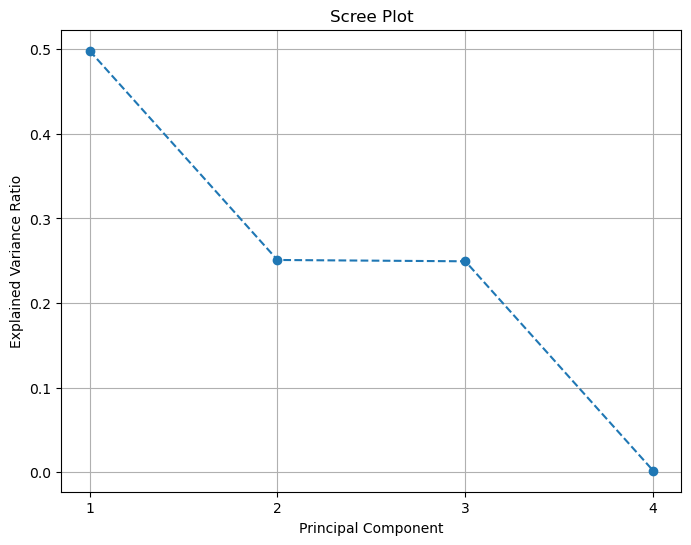

In [12]:
#With that done now lets create a scree plot to determine the number of principal components using the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

In [13]:
#Looking at the above scree plot, the elbow stops at two so that is our number of principal components.

In [14]:
#Now lets reinitialize and fit the PCA with that amount
pca_final = PCA(n_components = 2)
reduced_data = pca_final.fit_transform(scaled_pca_data)

In [15]:
#Now that we have done that, lets convert this into a dataframe.
pca_df = pd.DataFrame(data = reduced_data, columns = ['PC1', 'PC2'])

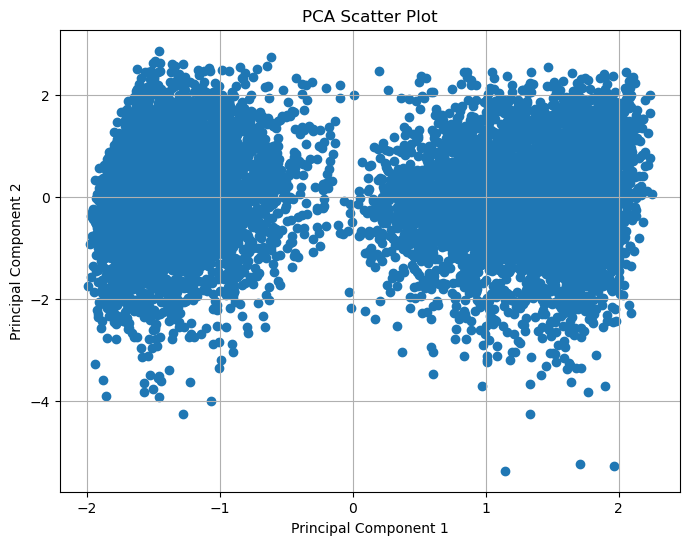

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [17]:
#The last two things I need to do are get:

#the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of each principal component: {explained_variance_ratio}")

Explained variance ratio of each principal component: [0.49828812 0.25083177 0.24926592 0.00161419]


In [1]:
#And the Total variance captured by selected components
total_variance_captured = (0.49828812 + 0.25083177)
print(f"Total variance captured by the selected components: {total_variance_captured}")

Total variance captured by the selected components: 0.74911989


In [ ]:
#This shows the combined variance of the PC1 and PC2 respectively